<a href="https://colab.research.google.com/github/klsu023/pycs4001_hw5/blob/main/pycs4001_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **pycs4001_hw5.ipynb**

### **Load the data**

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pycs4001_hw5/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


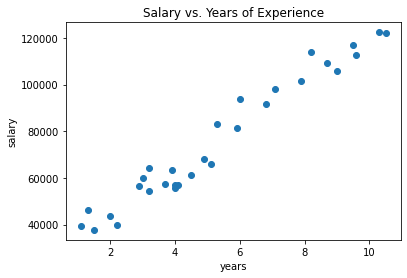

In [ ]:
x = np.array(data["YearsExperience"]).reshape(-1,1)
y = np.array(data["Salary"]).reshape(-1,1)
plt.scatter(x,y)
plt.title("Salary vs. Years of Experience")
plt.xlabel("years")
plt.ylabel("salary")
plt.show()

### **Preprocess the data (standardize)**

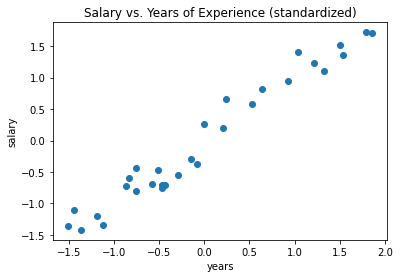

In [ ]:
scaler = StandardScaler()
sc_x = scaler.fit_transform(x)
sc_y = scaler.fit_transform(y)
plt.scatter(sc_x,sc_y)
plt.title("Salary vs. Years of Experience (standardized)")
plt.xlabel("years")
plt.ylabel("salary")
plt.show()

### **Split the data into training and testing sets**

In [ ]:
train_x, test_x, train_y, test_y  = train_test_split(sc_x, sc_y, test_size=0.2, random_state=10)

### **Train the model with training set**

In [ ]:
regression = LinearRegression()
regression.fit(train_x,train_y)

LinearRegression()

### **Using trained model to make predictions and calculate the MSE**

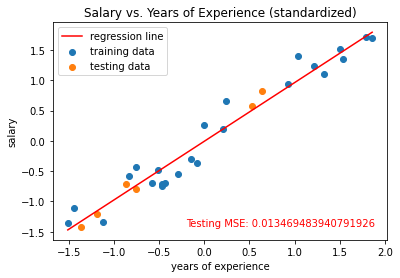

In [ ]:
y_p = regression.predict(test_x)
y_pred = regression.predict(sc_x)
plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.plot(sc_x,y_pred, color = 'red')
plt.title("Salary vs. Years of Experience (standardized)")
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.legend(["regression line","training data","testing data"])
plt.text(-0.2,-1.4,f"Testing MSE: {mean_squared_error(test_y, y_p)}", {"color": "red"})
plt.show()

### **Scale back**

In [ ]:
y_inv_p = scaler.inverse_transform(y_p)
y_inv_pred = scaler.inverse_transform(y_pred)
inv_train_y = scaler.inverse_transform(train_y)
inv_test_y = scaler.inverse_transform(test_y)
# execute sc_x = scaler.fit_transform(x) again so we can scale back train_x and test_x
sc_x = scaler.fit_transform(x)
inv_train_x = scaler.inverse_transform(train_x)
inv_test_x = scaler.inverse_transform(test_x)

### **Plot the final regression line**

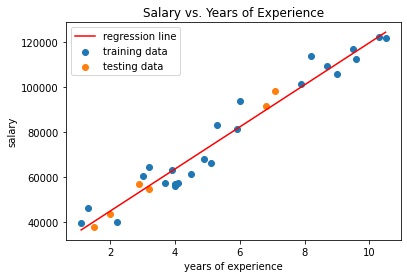

In [ ]:
plt.scatter(inv_train_x,inv_train_y)
plt.scatter(inv_test_x,inv_test_y)
plt.plot(x, y_inv_pred, color="red")
plt.title("Salary vs. Years of Experience")
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.legend(["regression line","training data","testing data"])
plt.show()